In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns

In [13]:
df = pd.read_csv("D:\Retail.csv")

In [14]:
df.head()


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [16]:
df.sum().isnull

<bound method Series.isnull of product_id                    bed1bed1bed1bed1bed1bed1bed1bed1bed1bed1bed1be...
product_category_name         bed_bath_tablebed_bath_tablebed_bath_tablebed_...
month_year                    01-05-201701-06-201701-07-201701-08-201701-09-...
qty                                                                        9799
total_price                                                            961751.1
freight_price                                                      13981.214494
unit_price                                                         71991.836672
product_name_lenght                                                       32935
product_description_lenght                                               518762
product_photos_qty                                                         1348
product_weight_g                                                        1248909
product_score                                                            2761.8
customers

In [ ]:


print("========== DATA VALIDATION SUMMARY ==========")

# 1. Volume Check
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

# 2. Missing Data Check
missing_summary = df.isnull().sum()
missing_cols = missing_summary[missing_summary > 0]
if len(missing_cols) > 0:
    print("\n[!] WARNING: Columns with missing data:")
    print(missing_cols)
else:
    print("\n[OK] No missing values found.")

# 3. Duplicate Check
dupes = df.duplicated().sum()
if dupes > 0:
    print(f"\n[!] WARNING: Found {dupes} duplicate rows.")
else:
    print("\n[OK] No duplicates found.")

# 4. Negative Value Check (Sanity Check)
# 'qty' and 'unit_price' should never be negative
if (df['qty'] < 0).any() or (df['unit_price'] < 0).any():
    print("\n[!] CRITICAL: Found negative values in Quantity or Price.")
else:
    print("\n[OK] Prices and Quantities are valid (positive).")

print("=============================================")

========== DATA VALIDATION SUMMARY ==========
Total Rows: 676
Total Columns: 30

[OK] No missing values found.

[OK] No duplicates found.

[OK] Prices and Quantities are valid (positive).


### Create two new columns to make this data useful

In [ ]:


# 1. Calculate Total Revenue
# (This tells us which products generate the most money)
df['total_revenue'] = df['qty'] * df['unit_price']

# 2. Calculate Competitor Price Difference
# (If positive, you are more expensive. If negative, you are cheaper.)
# Note: We assume 'comp_1' is the main competitor column.
df['price_diff'] = df['unit_price'] - df['comp_1']

# 3. Create a "Price Position" Category
# This helps in making charts later (e.g., "Are we Premium or Budget?")
def categorize_price(row):
    if row['price_diff'] > 0:
        return 'Premium (Higher than Comp)'
    elif row['price_diff'] < 0:
        return 'Budget (Lower than Comp)'
    else:
        return 'Matched Price'

df['price_position'] = df.apply(categorize_price, axis=1)

# --- VIEW RESULTS ---
# Let's see the top 5 products by Revenue
print("Top 5 Products by Revenue:")
top_products = df[['product_id', 'qty', 'unit_price', 'comp_1', 'price_position', 'total_revenue']] \
                 .sort_values(by='total_revenue', ascending=False).head(5)

display(top_products)

Top 5 Products by Revenue:


,product_id,qty,unit_price,comp_1,price_position,total_revenue
673,bed5,59,205.000000,89.900000,Premium (Higher than Comp),12095.000000
277,watches6,114,103.792523,103.792523,Matched Price,11832.347668
674,bed5,52,199.509804,89.900000,Premium (Higher than Comp),10374.509803
175,computers6,69,149.900000,149.000000,Premium (Higher than Comp),10343.100000
549,health2,28,330.000000,23.990000,Premium (Higher than Comp),9240.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

### Add Inventory & Visualize

C:\Users\prade\AppData\Local\Temp\ipykernel_31040\4011381923.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='product_id', y='total_revenue', ax=axes[1], palette='Greens_r')


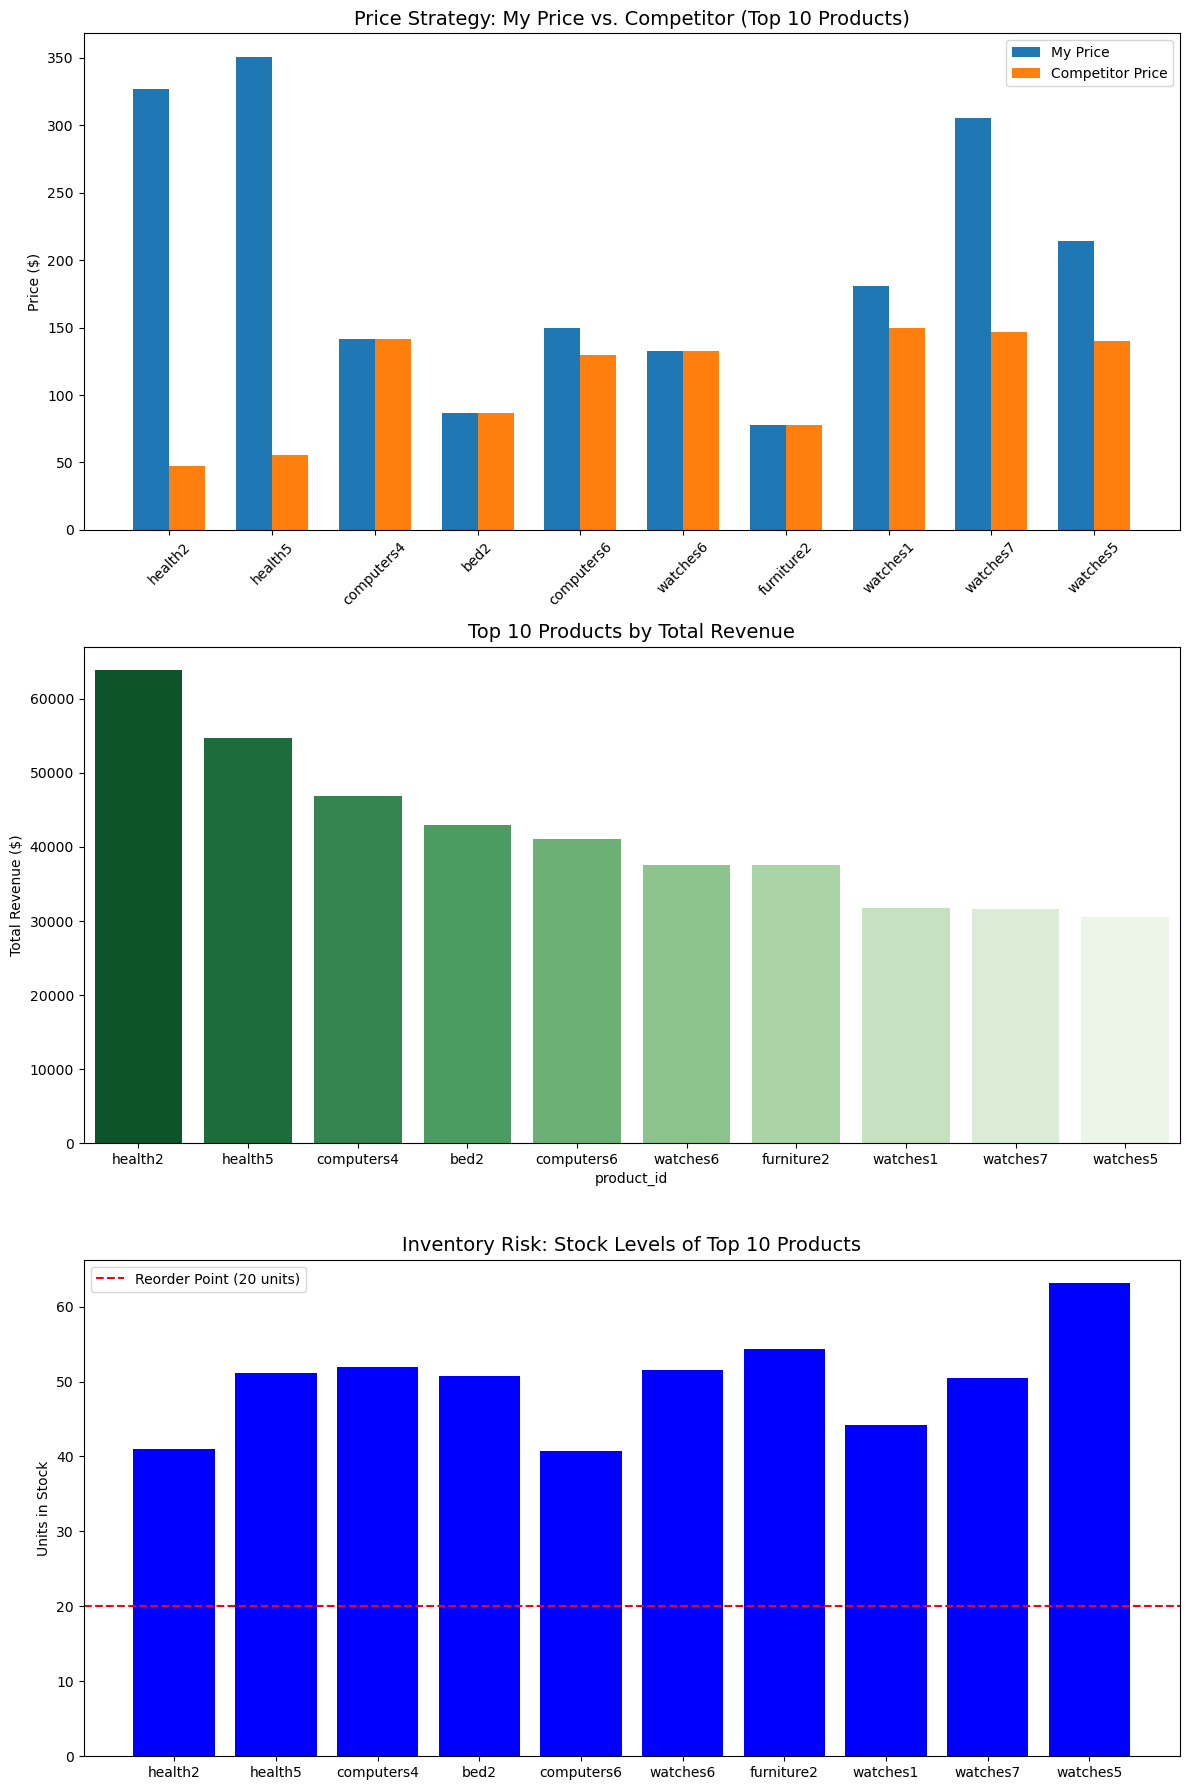

In [20]:

# --- 1. SIMULATE INVENTORY DATA ---
# We create a random stock level between 0 and 100 for every row
np.random.seed(42) # This ensures the random numbers are the same every time you run it
df['stock_level'] = np.random.randint(0, 100, size=len(df))

# Calculate "Stock Status"
# If stock < 20, it's "Low Stock". Otherwise "Healthy".
df['stock_status'] = df['stock_level'].apply(lambda x: 'Low Stock' if x < 20 else 'Healthy')

# --- 2. PREPARE DATA FOR PLOTTING ---
# Let's group by Product ID to get averages for the charts
# We take the top 10 products by Total Revenue to keep the chart readable
top_10 = df.groupby('product_id').agg({
    'total_revenue': 'sum',
    'qty': 'sum',
    'unit_price': 'mean',
    'comp_1': 'mean',
    'stock_level': 'mean' # Average stock during the period
}).sort_values('total_revenue', ascending=False).head(10).reset_index()

# --- 3. CREATE THE DASHBOARD ---
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# CHART 1: Price Comparison (You vs Competitor)
# Are we pricing our top items higher than the competition?
x = np.arange(len(top_10))
width = 0.35

axes[0].bar(x - width/2, top_10['unit_price'], width, label='My Price', color='#1f77b4')
axes[0].bar(x + width/2, top_10['comp_1'], width, label='Competitor Price', color='#ff7f0e')
axes[0].set_title('Price Strategy: My Price vs. Competitor (Top 10 Products)', fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(top_10['product_id'], rotation=45)
axes[0].legend()
axes[0].set_ylabel('Price ($)')

# CHART 2: Revenue Performance
# Which products are making the most money?
sns.barplot(data=top_10, x='product_id', y='total_revenue', ax=axes[1], palette='Greens_r')
axes[1].set_title('Top 10 Products by Total Revenue', fontsize=14)
axes[1].set_ylabel('Total Revenue ($)')

# CHART 3: Inventory Health
# Do these high-selling items have enough stock?
colors = ['red' if x < 20 else 'blue' for x in top_10['stock_level']]
axes[2].bar(top_10['product_id'], top_10['stock_level'], color=colors)
axes[2].axhline(y=20, color='r', linestyle='--', label='Reorder Point (20 units)')
axes[2].set_title('Inventory Risk: Stock Levels of Top 10 Products', fontsize=14)
axes[2].set_ylabel('Units in Stock')
axes[2].legend()

plt.tight_layout()
plt.show()

### Build the Alert System:

In [21]:

# 1. Calculate Average Sales per Product (Velocity)
# We group by product to see how many they sell on average per entry
product_velocity = df.groupby('product_id')['qty'].mean().reset_index()
product_velocity.rename(columns={'qty': 'avg_sales_velocity'}, inplace=True)

# 2. Merge this velocity back into the main data
df_analysis = pd.merge(df, product_velocity, on='product_id')

# 3. Calculate Days of Supply
# (Avoid division by zero: if velocity is 0, set days_supply to a high number)
df_analysis['days_supply'] = df_analysis.apply(
    lambda x: x['stock_level'] / x['avg_sales_velocity'] if x['avg_sales_velocity'] > 0 else 999, 
    axis=1
)

# 4. Create the Action Label (The "Prescription")
def recommend_action(row):
    if row['days_supply'] < 7:
        return 'URGENT: Order Now'
    elif row['days_supply'] < 15:
        return 'Warning: Monitor'
    else:
        return 'Safe'

df_analysis['action_recommendation'] = df_analysis.apply(recommend_action, axis=1)

# --- VIEW THE REPORT ---
# Show the products that need immediate attention
urgent_restock = df_analysis[df_analysis['action_recommendation'] == 'URGENT: Order Now']

print("========== RESTOCK REPORT ==========")
print(f"Total Products needing URGENT ACTION: {urgent_restock['product_id'].nunique()}")
print("\nTop 5 Urgent Items:")
cols_to_show = ['product_id', 'stock_level', 'avg_sales_velocity', 'days_supply', 'action_recommendation']
display(urgent_restock[cols_to_show].drop_duplicates('product_id').head(5))

========== RESTOCK REPORT ==========
Total Products needing URGENT ACTION: 52

Top 5 Urgent Items:


,product_id,stock_level,avg_sales_velocity,days_supply,action_recommendation
0,bed1,51,8.937500,5.706294,URGENT: Order Now
16,garden5,1,8.071429,0.123894,URGENT: Order Now
31,consoles1,58,11.833333,4.901408,URGENT: Order Now
44,garden7,2,7.187500,0.278261,URGENT: Order Now
58,health9,1,15.611111,0.064057,URGENT: Order Now


### Final Report

In [22]:
# Save specific columns for the business team
final_report = df_analysis[['product_id', 'total_revenue', 'stock_level', 
                            'days_supply', 'action_recommendation', 'price_position']]

# Remove duplicates to keep it clean (one row per product)
final_report = final_report.drop_duplicates(subset=['product_id'])

# Export
final_report.to_csv('Final_Inventory_Recommendations.csv', index=False)
print("Report saved as 'Final_Inventory_Recommendations.csv'")

Report saved as 'Final_Inventory_Recommendations.csv'
